# Creating First Quantum Circuit in Qiskit

To create a quantum circuit, we will import QuantumCircuit class, and create a new QuantumCircuit object. Qiskit runs on top of Python. On creating a Quantum circuit, we need to tell Python how many qubits the circuit should have, and we can optionally also tell it hou many classical bits our circuits should it have to store the measurements of our qubits. The use of classic bits will come handy in later iterations of this repository.

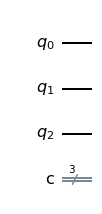

In [9]:
# From Qiskit, import QuantumCircuit. QuantumCircuit, as the name explains, creates a Quantum circuit in the Quantum computer.
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

Next, we need to measure the states of the qubits the quantum computers are in. Measurement is the fundamentql priniple of Quantum Mechanics.

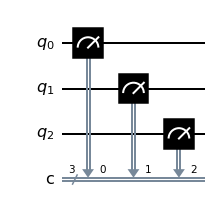

In [10]:
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

Next, to see what the output the circuit gives, we need to use a quantum simulator. According the Qiskit documentation, a quantum simulator "is a standard computer calculating what an ideal quantum computer would do."

Simulating a quantum computer is believed to be difficult for classical computers, as the best algorithms we have grow exponentially with the number of qubits.

Let's import Qiskit's simulator called Aer, and make a new simulator object.

In [11]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

To do the simulation, we execute `.run()` method. This returns a "job", which contains the information about the experiment. You can refer to the Qiskit documentation to learn more on job.

To get the results from the job, we use the results method, and the most popular way to view the results is as a dictionary of "counts".

In [12]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

## Encoding an imput

Now, let's look at how to encode a different binary string as an input. For this, we need what is known as NOT gate. This is a basic logic gate found in common computer circuits. What it does is it flips the state exactly its opposite state. For example, if 0 passes down through NOT gate, it comes out as 1 and vice-versa. For qubits, we use a get known as X-gate for this.

Below, we will create a new circuit dedicated to the job of encoding.

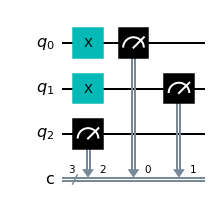

In [13]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

In [14]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

# Creating an adder circuit

### Remembering how to add

To look at turning inputs into outputs, we need a problem to solve. Let’s do some basic maths. In primary school, you will have learned how to take large mathematical problems and break them down into manageable pieces. For example, how would you go about solving this addition problem?

  3573
+ 9562

How can we solve a problem like this? One way is to do it digit by digit, from right to left. So we start with 3+2. And then 7 + 6, followed by 5+5 and then 3+9. Adding the numbers, we get:

  3573
+ 9562
---------
 13135
 
 This may just be simple addition, but it demonstrates the principles behind all algorithms. Whether the algorithm is designed to solve mathematical problems or process text or images, we always break big tasks down into small and simple steps.

To run on a computer, algorithms need to be compiled down to the smallest and simplest steps possible. To see what these look like, let’s do the above addition problem again but in binary.

(Extracted from <a href="https://learn.qiskit.org/course/introduction/the-atoms-of-computation#the-11-2"><u>learn.qiskit.org/course</u></a>)

### Adding binary numbers

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/0.svg" alt="Example Binary processing" width="200" height="100">

Note that the second number has a bunch of extra 0s on the left. This just serves to make the two strings the same length.

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/1.svg" alt="Example Binary Processing" width="200" height="100">

Our first task is to do the 1+0 for the column on the right. In binary, as in any number system, the answer is 1.

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/2.svg" alt="Example Binary Processing" width="200" height="100">

We get the same result for the 0+1 of the second column.

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/3.svg" alt="Example Binary Processing" width="200" height="100">

Next, we have 1+1. As you’ll surely be aware, 1+1=2. In binary, the number 2 is written 10, and so requires two bits. This means that we need to carry the 1, just as we would for the number 10 in decimal. The next column now requires us to calculate 1+1+1. This means adding three numbers together, so things are getting complicated for our computer.

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/4.svg" alt="Example Binary Processing" width="200" height="100">

But we can still compile it down to simpler operations, and do it in a way that only ever requires us to add two bits together. For this, we can start with just the first two 1s.

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/5.svg" alt="Example Binary Processing" width="200" height="100">

Now we need to add this 10 to the final 1 , which can be done using our usual method of going through the columns. The final answer is 11 (also known as 3).

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/6.svg" alt="Example Binary Processing" width="200" height="100">

Now we can get back to the rest of the problem. With the answer of 11, we have another carry bit. So now we have another 1+1+1 to do. But we already know how to do that, so it’s not a big deal.


In fact, everything left so far is something we already know how to do. This is because, if you break everything down into adding just two bits, there are only four possible things you’ll ever need to calculate. Here are the four basic sums (we’ll write all the answers with two bits to be consistent):

<img src="https://learn.qiskit.org/content/intro/images/aoc/carousel/1/7.svg" alt="Example Binary Processing" width="200" height="100">


This is called a half adder. If our computer can implement this, and if it can chain many of them together, it can add anything.

## Adding with Quantum Circuits

<img src="https://learn.qiskit.org/content/intro/images/aoc/half-adder.svg" alt="Example of Addition of Quantum Circuits" width="500" height="300">

The above example encodes a 1 in both these qubits, and so it seeks to find the solution of 1+1. The result will be a string of two bits, which we will read out from the qubits 2 and 3. All that remains is to fill in the actual program, which lives in the blank space in the middle.

The dashed lines in the image are just to distinguish the different parts of the circuit (although they can have more interesting uses too)

The basic operations of computing are known as logic gates. We’ve already used the NOT gate, but this is not enough to make our half adder. We could only use it to manually write out the answers. Since we want the computer to do the actual computing for us, we’ll need some more powerful gates.

In the traditional computation, when we need something that can figure out whether two bits are different or not, in the study of digital computation, a gate is used. This is called an XOR gate.

<center>

| Input 1   |   Input 2    |  XOR Output |
|:----------:|:-------------:|:------:|
| 0 |  0 | 0 |
| 0 |    1   |   1 |
| 1 | 0 |    1 |
| 1 | 1 |    0 |

</center>

In quantum computers, the job of the XOR gate is done by the ‘controlled-NOT gate’. We will call it the ‘CNOT’. In circuit diagrams, it is drawn as in the image below. This is applied to a pair of qubits.

<img src="https://learn.qiskit.org/content/intro/images/aoc/cnot_xor.svg" alt="CNOT Gate" width="500" height="300">

This is applied to a pair of qubits. One acts as the control qubit (this is the one with the little dot). The other acts as the target qubit (with the big circle and cross - kind of like a target mark).

In Qiskit, the method `.cx()` is used to add a CNOT gate to the circuit. We need to give the indices of two qubits it acts on as arguments.

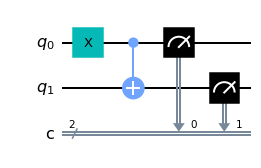

Result:  {'11': 1024}


In [15]:
# Create a QuantumCircuit with two qubits and two classic bits.
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)    # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())        # displays a drawing of the circuit
job =  sim.run(qc)        # run the experiment
result  = job.result()    # get the results
# interpret the results as a "counts" dictionary.
print("Result: ", result.get_counts())

For half adders, we will not overwrite one of our inputs. Instead, we want to write the results on a new pair of qubits. For this, we will use two CNOTs and write output to a new qubit which we know will be in state 0:

<img src="https://learn.qiskit.org/content/intro/images/aoc/xor.svg" alt="A XOR B" width = "300" height = "200">

We are halfway through the adder circuit and we need to perform a new operation. We need to check whether both inputs are 1. If they are — and only if they are — we need to do a NOT gate on qubit 3. That will flip it to the required value of 1 for this case only, giving us the output we need. For this, we need a new gate: like a CNOT but controlled on two qubits instead of just one. This will perform a NOT on the target qubit only when both controls are in state 1. This new gate is called the Toffoli gate. IF you are familiar with Boolean logic gates, it is basically an AND gate.

The Toffoli gate, invented by Tommaso Toffoli, is a universal reversible logic gate, which means that any reversible circuit can be constructed from Toffoli gates. It is also known as the controlled-controlled-not gate, which describes its action. It has 3-bit inputs and outputs; if the first two bits are both set to 1, it inverts the third bit, otherwise all bits stay the same.

<img src="https://learn.qiskit.org/content/intro/images/aoc/ha_circuit.svg" alt="Toffoli Gate" width="360" height="180">

In Qiskit, the method `.ccx()` is used to call Toffolli gate in circuit for computation.

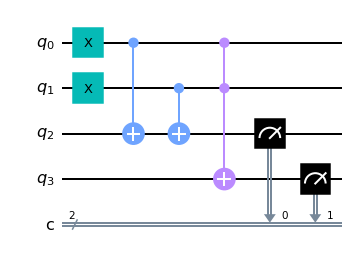

In [18]:
qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
qc.x(0)
qc.x(1)

# Next, it should carry out the adder circuit we created
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
qc.measure(2,0)
qc.measure(3,1)
qc.draw()

In [19]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary

{'10': 1024}

Here we can see that the result ‘10’ was measured 1024 times, and we didn’t measure any other result.